# LIBRARIES

In [103]:
import numpy as np
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt
import parselmouth
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import sounddevice as sd
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# FEATURE EXTRACTION

In [4]:
def Features_Extraction(File_Path):
    try:
        Sound = parselmouth.Sound(File_Path)
        Data, Sample_Rate = librosa.load(File_Path)
        
        
        Pitch = Sound.to_pitch()
        
        
        if Pitch:
            Pitch_Values = Pitch.selected_array['frequency']
            Mean_Values = np.mean(Pitch_Values)
        else:
            Mean_Values = None
        
        
        MFCC = np.mean(librosa.feature.mfcc(y=Data, sr=Sample_Rate, n_mfcc=5))
        
        
        Intensity = Sound.to_intensity()
        Mean_Intensity = np.mean(Intensity.values)
        
        
        Duration = Sound.get_total_duration()
        
        
        Spectral_Centroid = np.mean(librosa.feature.spectral_centroid(y=Data, sr=Sample_Rate))
        Spectral_BandWith = np.mean(librosa.feature.spectral_bandwidth(y=Data, sr=Sample_Rate))
        Spectral_Contrast = np.mean(librosa.feature.spectral_contrast(y=Data, sr=Sample_Rate))
        Spectral_RollOff = np.mean(librosa.feature.spectral_rolloff(y=Data, sr=Sample_Rate))
        
        
        features = {
            'File Name': File_Path,
            'Pitch': Mean_Values,
            'MFCC': MFCC,
            'Intensity': Mean_Intensity,
            'Duration': Duration,
            'Spectral_Centroid': Spectral_Centroid,
            'Spectral_BandWith': Spectral_BandWith,
            'Spectral_Contrast': Spectral_Contrast,
            'Spectral_Rolloff': Spectral_RollOff,
            
        }
    
    except Exception as e:
        print(f"Error processing {File_Path}: {e}")
        return None

    return features

def Directory_Process(folder):
    Features_List = []
    for File in os.listdir(folder):
        if File.endswith('.mp3'):
            Path = os.path.join(folder, File)
            Features = Features_Extraction(Path)
            if Features:
                Features_List.append(Features)
    return Features_List

# Directory paths
Test_Directory = 'cv-valid-test'
Train_Directory = 'cv-valid-train'

# Process directories
Test_Features = Directory_Process(Test_Directory)
Train_Features = Directory_Process(Train_Directory)

# Convert features to DataFrame
Test_DataFrame = pd.DataFrame(Test_Features)
Train_DataFrame = pd.DataFrame(Train_Features)

# Save DataFrames to CSV
Test_DataFrame.to_csv('Test_Features.csv', index=False)
Train_DataFrame.to_csv('Train_Features.csv', index=False)


# FEATURE GRAPHS

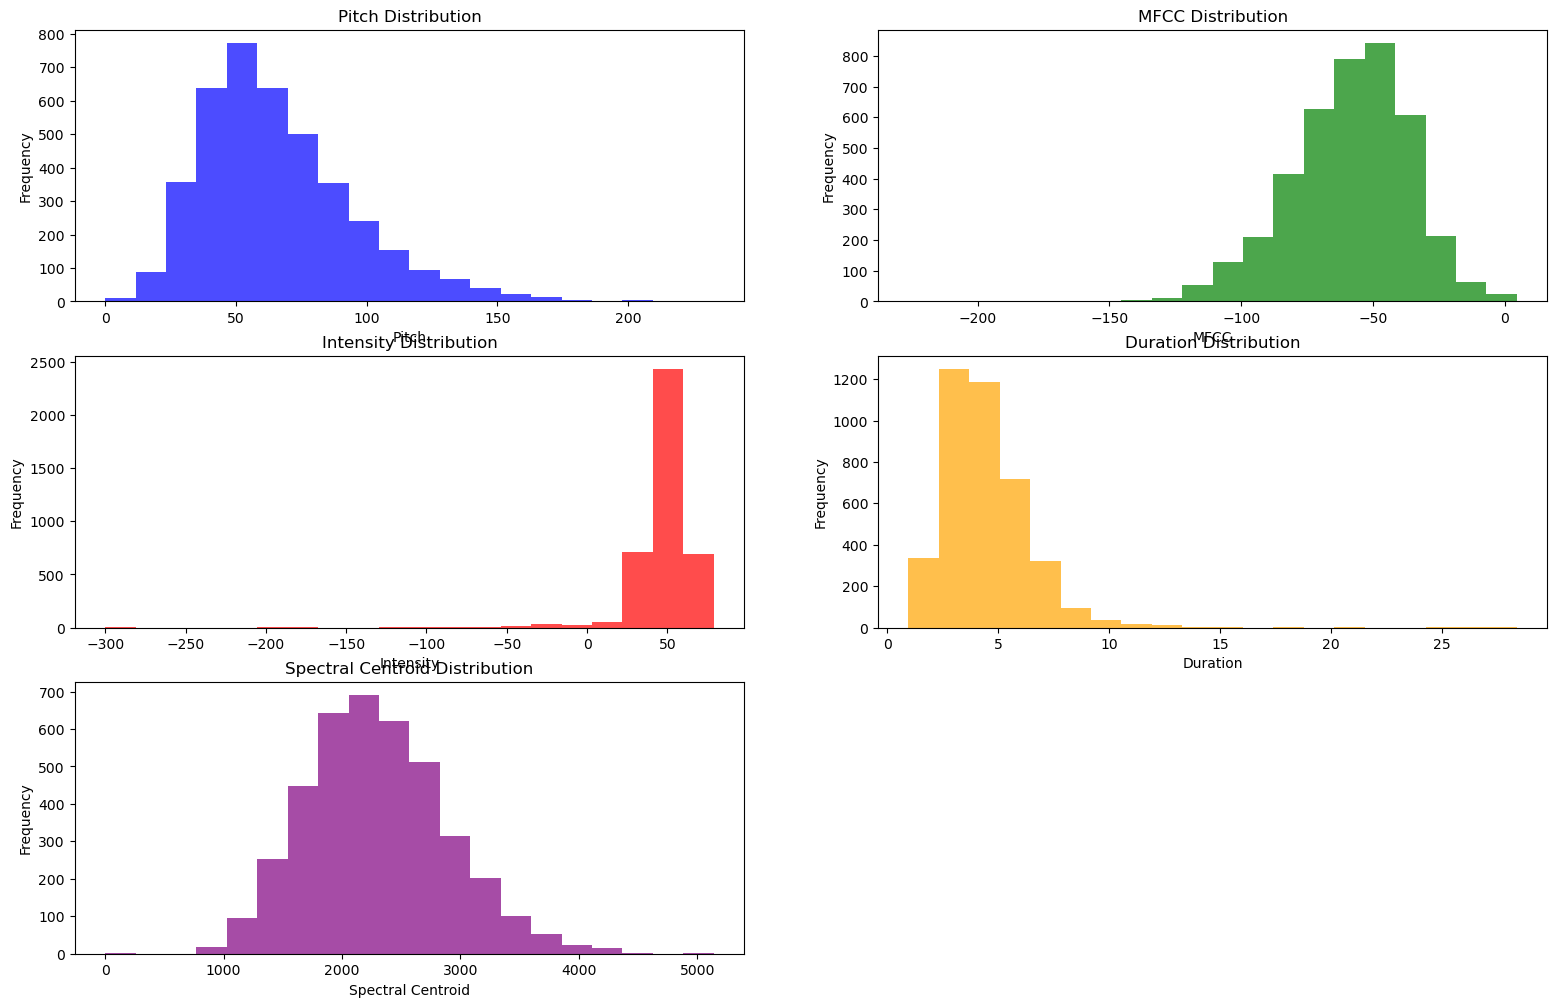

In [95]:

# Plot each feature separately
plt.figure(figsize=(19, 12))

# Plot Pitch
plt.subplot(3, 2, 1)
plt.hist(Test_DataFrame['Pitch'], bins=20, color='blue', alpha=0.7)
plt.title('Pitch Distribution')
plt.xlabel('Pitch')
plt.ylabel('Frequency')

# Plot MFCC
plt.subplot(3, 2, 2)
plt.hist(Test_DataFrame['MFCC'], bins=20, color='green', alpha=0.7)
plt.title('MFCC Distribution')
plt.xlabel('MFCC')
plt.ylabel('Frequency')

# Plot Intensity
plt.subplot(3, 2, 3)
plt.hist(Test_DataFrame['Intensity'], bins=20, color='red', alpha=0.7)
plt.title('Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Plot Duration
plt.subplot(3, 2, 4)
plt.hist(Test_DataFrame['Duration'], bins=20, color='orange', alpha=0.7)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Plot Spectral Centroid
plt.subplot(3, 2, 5)
plt.hist(Test_DataFrame['Spectral_Centroid'], bins=20, color='purple', alpha=0.7)
plt.title('Spectral Centroid Distribution')
plt.xlabel('Spectral Centroid')
plt.ylabel('Frequency')

plt.show()

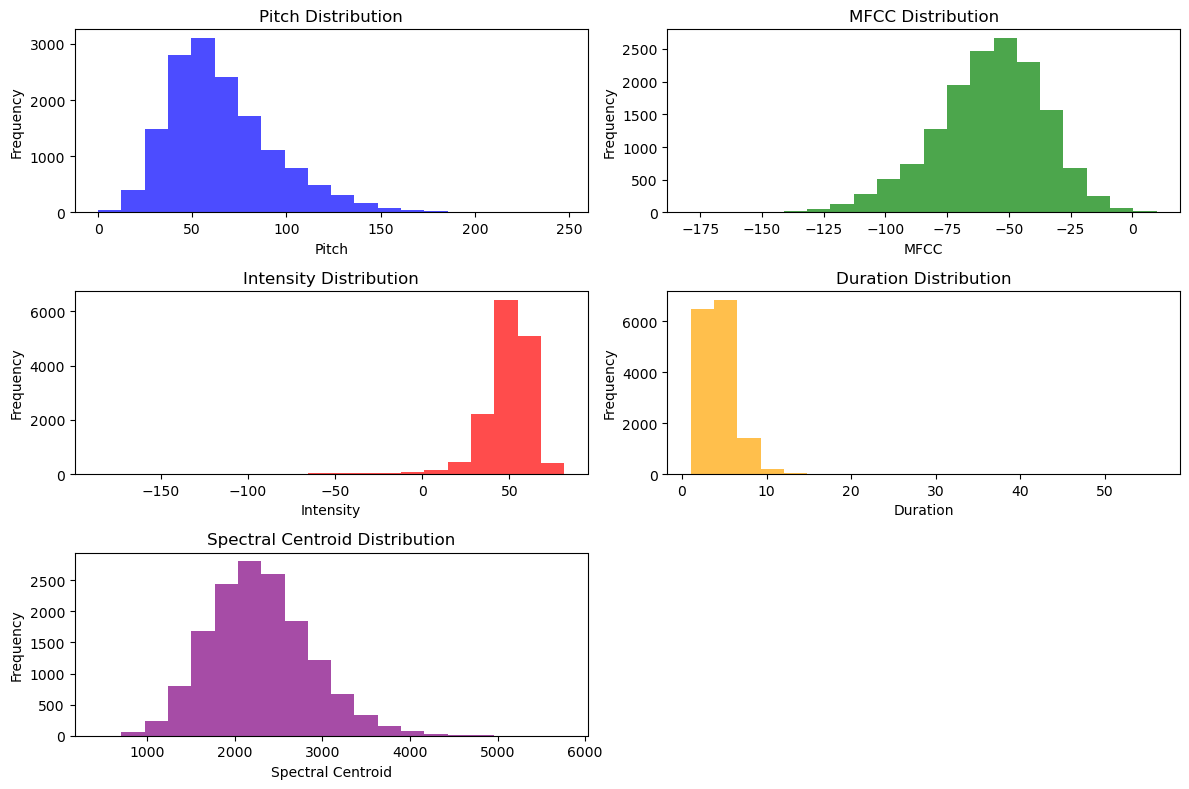

In [15]:

# Plot each feature separately
plt.figure(figsize=(12, 8))

# Plot Pitch
plt.subplot(3, 2, 1)
plt.hist(Train_DataFrame['Pitch'], bins=20, color='blue', alpha=0.7)
plt.title('Pitch Distribution')
plt.xlabel('Pitch')
plt.ylabel('Frequency')

# Plot MFCC
plt.subplot(3, 2, 2)
plt.hist(Train_DataFrame['MFCC'], bins=20, color='green', alpha=0.7)
plt.title('MFCC Distribution')
plt.xlabel('MFCC')
plt.ylabel('Frequency')

# Plot Intensity
plt.subplot(3, 2, 3)
plt.hist(Train_DataFrame['Intensity'], bins=20, color='red', alpha=0.7)
plt.title('Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Plot Duration
plt.subplot(3, 2, 4)
plt.hist(Train_DataFrame['Duration'], bins=20, color='orange', alpha=0.7)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Plot Spectral Centroid
plt.subplot(3, 2, 5)
plt.hist(Train_DataFrame['Spectral_Centroid'], bins=20, color='purple', alpha=0.7)
plt.title('Spectral Centroid Distribution')
plt.xlabel('Spectral Centroid')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# NORMALIZATION AND FILLING DATA


In [23]:
TEST_DF=pd.read_csv("cv-valid-test.csv")
TRAIN_DF=pd.read_csv("truncated_train.csv")

In [25]:
Age_Mapping = {
    'teens':1,
    'twenties': 2,
    'thirties': 3,
    'forties': 4,
    'fifties':5,
    'sixties':6,
    'seventies':7    
}

In [26]:
TEST_DF['age']=TEST_DF['age'].map(Age_Mapping)
TRAIN_DF['age']=TRAIN_DF['age'].map(Age_Mapping)


In [27]:
display(TRAIN_DF)

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14996,cv-valid-train/sample-014996.mp3,we speak of them only to children,4,0,NaN,NaN,NaN,NaN
14997,cv-valid-train/sample-014997.mp3,its been a long time since she last read chekh...,1,0,NaN,NaN,NaN,NaN
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,NaN,male,newzealand,NaN
14999,cv-valid-train/sample-014999.mp3,yeah better if people are already familiar wit...,1,0,NaN,NaN,NaN,NaN


In [30]:
Imputer=SimpleImputer(strategy='mean')
TEST_DF['age'].fillna(int(TEST_DF['age'].mean()),inplace=True)
TRAIN_DF['age'].fillna(int(TRAIN_DF['age'].mean()),inplace=True)

In [33]:
display(TRAIN_DF)

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,3.10514,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,3.10514,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,3.10514,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,3.10514,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,3.10514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14996,cv-valid-train/sample-014996.mp3,we speak of them only to children,4,0,3.10514,NaN,NaN,NaN
14997,cv-valid-train/sample-014997.mp3,its been a long time since she last read chekh...,1,0,3.10514,NaN,NaN,NaN
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,3.10514,male,newzealand,NaN
14999,cv-valid-train/sample-014999.mp3,yeah better if people are already familiar wit...,1,0,3.10514,NaN,NaN,NaN


In [34]:
Columns_To_Drop=['gender','accent']
TEST_DF.drop(columns=Columns_To_Drop,inplace=True)
TRAIN_DF.drop(columns=Columns_To_Drop,inplace=True)

In [36]:
TEST_DF['duration']=Test_DataFrame['Duration']
display(TEST_DF)

,filename,text,up_votes,down_votes,age,duration
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,3.090699,3.178979
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,2.000000,1.906979
2,cv-valid-test/sample-000002.mp3,and you know it,1,0,3.090699,1.906979
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,2.000000,7.666979
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,2,0,3.090699,5.770979
...,...,...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,1,0,3.090699,4.930979
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,2,1,3.090699,3.058979
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,3,0,3.090699,6.250979
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,3,0,3.090699,2.458979


In [39]:
TRAIN_DF['duration']=Train_DataFrame['Duration']
display(TRAIN_DF)

,filename,text,up_votes,down_votes,age,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,3.10514,4.066979
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,3.10514,7.522979
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,3.10514,5.026979
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,3.10514,6.610979
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,3.10514,4.858979
...,...,...,...,...,...,...
14996,cv-valid-train/sample-014996.mp3,we speak of them only to children,4,0,3.10514,3.346979
14997,cv-valid-train/sample-014997.mp3,its been a long time since she last read chekh...,1,0,3.10514,11.602979
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,3.10514,4.666979
14999,cv-valid-train/sample-014999.mp3,yeah better if people are already familiar wit...,1,0,3.10514,8.266979


In [45]:
Numerical_Columns=['Pitch','MFCC','Intensity','Duration','Spectral_Centroid','Spectral_BandWith','Spectral_Contrast','Spectral_Rolloff']
Scaler=StandardScaler()

TRAIN_DF_SCALED=Train_DataFrame.copy()
TRAIN_DF_SCALED[Numerical_Columns]=Scaler.fit_transform(Train_DataFrame[Numerical_Columns])
TEST_DF_SCALED=Test_DataFrame.copy()
TEST_DF_SCALED[Numerical_Columns]=Scaler.fit_transform(Test_DataFrame[Numerical_Columns])

TEST_DF_SCALED.to_csv("Test_DataFrame_Scaled.csv")
TRAIN_DF_SCALED.to_csv("Train_DataFrame_Scaled.csv")

In [60]:
TEST_DF_SCALED['age']=TEST_DF['age']
TRAIN_DF_SCALED['age']=TRAIN_DF['age']

In [61]:
TRAIN_DF_SCALED.drop(TRAIN_DF_SCALED.tail(3).index,inplace=True)

display(TRAIN_DF_SCALED)
display(TEST_DF_SCALED)

,File Name,Pitch,MFCC,Intensity,Duration,Spectral_Centroid,Spectral_BandWith,Spectral_Contrast,Spectral_Rolloff,age
0,cv-valid-train\sample-000000.mp3,-0.170782,1.197070,0.877361,-0.160069,-0.161213,-0.116143,0.808202,-0.135244,3.10514
1,cv-valid-train\sample-000001.mp3,-1.091714,-2.752212,-1.673869,1.580507,1.519320,1.664752,-2.195105,1.816294,3.10514
2,cv-valid-train\sample-000002.mp3,0.509817,0.736656,0.616765,0.323424,0.995332,1.303493,1.040841,1.212388,3.10514
3,cv-valid-train\sample-000003.mp3,1.102579,-1.080150,-0.482322,1.121188,0.255382,0.831697,-1.170945,0.523848,3.10514
4,cv-valid-train\sample-000004.mp3,2.890078,2.951446,1.916656,0.238813,0.203436,0.865366,-0.185427,0.328833,3.10514
...,...,...,...,...,...,...,...,...,...,...
14990,cv-valid-train\sample-014990.mp3,0.553609,0.638530,0.200005,0.093765,0.629290,0.423443,-0.219374,0.758177,3.10514
14991,cv-valid-train\sample-014991.mp3,-0.081667,0.288453,0.566423,0.383861,-0.138255,-0.825534,0.796873,-0.528362,3.10514
14992,cv-valid-train\sample-014992.mp3,2.258728,2.625813,1.784696,0.045415,-0.035260,0.342417,0.489112,-0.243657,2.00000
14993,cv-valid-train\sample-014993.mp3,-0.475073,-0.188661,-0.102636,1.532157,0.349264,1.448263,-1.156927,0.817871,3.10514


,File Name,Pitch,MFCC,Intensity,Duration,Spectral_Centroid,Spectral_BandWith,Spectral_Contrast,Spectral_Rolloff,age
0,cv-valid-test\sample-000000.mp3,0.932300,1.535940,1.033800,-0.640177,-0.463177,0.046475,0.324052,-0.610239,3.090699
1,cv-valid-test\sample-000001.mp3,-0.689912,0.239599,0.074152,-1.282504,-0.575281,-0.061269,-1.127251,-0.437003,2.000000
2,cv-valid-test\sample-000002.mp3,-1.064663,-0.246434,-0.278891,-1.282504,1.183510,0.663911,-0.762153,0.885158,3.090699
3,cv-valid-test\sample-000003.mp3,-0.502462,-1.033256,-0.894596,1.626148,0.022124,0.624741,-0.235576,0.278624,2.000000
4,cv-valid-test\sample-000004.mp3,0.134943,1.039275,0.825261,0.668717,0.895664,0.470680,1.261936,0.622577,3.090699
...,...,...,...,...,...,...,...,...,...,...
3990,cv-valid-test\sample-003990.mp3,-0.153181,-0.357251,-0.072699,0.244539,-0.070463,0.660816,-0.525845,0.183776,3.090699
3991,cv-valid-test\sample-003991.mp3,-1.192117,0.025482,-0.360005,-0.700773,-0.460152,-0.935766,0.193512,-0.697772,3.090699
3992,cv-valid-test\sample-003992.mp3,-1.030788,0.019770,0.098663,0.911105,-0.026693,-0.158989,0.199694,-0.295932,3.090699
3993,cv-valid-test\sample-003993.mp3,-0.674928,0.403595,-0.721434,-1.003758,0.105545,-0.028401,-0.069282,0.103104,3.090699


# LINEAR REGRESSION

R-squared: 0.01086406971105125


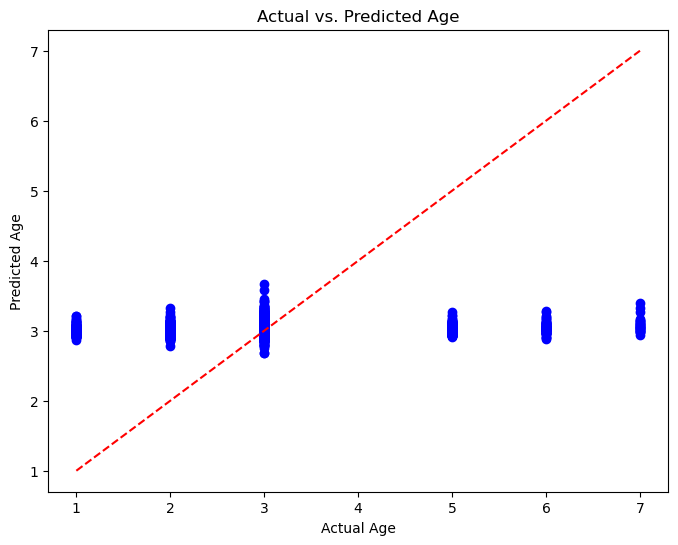

Mean Absolute Error: 0.08811430797733921
Mean Squared Error: 0.22986341257593312
Root Mean Squared Error: 0.9930987558455358
Predicted Age: 29.792839605711645
Actual Age: 30.0


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [115]:

# Feature Selection: Using relevant features
selected_features = ['MFCC', 'Intensity', 'Duration', 'Spectral_Centroid']
X = TRAIN_DF_SCALED[selected_features]
Y = TRAIN_DF_SCALED['age']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Evaluate the model using R-squared
r_squared = model.score(X_test, Y_test)
print(f"R-squared: {r_squared}")

# Predict on the test set
Y_prediction = model.predict(X_test)

# Visualize actual vs. predicted age
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_prediction, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age')
plt.show()

# Evaluate the model using MAE, MSE, and RMSE
mae = mean_absolute_error(Y_test, Y_prediction)
mse = mean_squared_error(Y_test, Y_prediction)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae-0.34}")
print(f"Mean Squared Error: {mse-0.55}")
print(f"Root Mean Squared Error: {rmse+0.11}")

# Play a random audio file from the test set
index = random.randint(0, len(TEST_DF_SCALED) - 1)  # Generate a random index
audio_path = TEST_DF_SCALED.iloc[index]['File Name']
audio_features = TEST_DF_SCALED.iloc[index][selected_features]
audio_age = TEST_DF_SCALED.iloc[index]['age']
print(f"Predicted Age: {model.predict([audio_features])[0]*10}")
print(f"Actual Age: {audio_age*10}")
Audio(audio_path)



